# Glass Identification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("glass.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.drop(0,axis=1, inplace=True)

In [4]:
df.head(1)

,1,2,3,4,5,6,7,8,9
0,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [13]:
df=df.rename(columns={1:'RI',2:'Na',3:'Mg',4:'Al',5:'Si',6:'K',7:'Ca',8:'Ba',9:'Fe',10:'Target'})

In [14]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.2 KB


In [16]:
df.nunique()

RI    142
Na     94
Mg    118
Al    133
Si     65
K     143
Ca     34
Ba     32
Fe      6
dtype: int64

In [17]:
df['target'].unique()

KeyError: 'target'

In [18]:
df['target']=df['target'].replace({1:1,2:1,3:1,4:1,5:0,6:0,7:0})

KeyError: 'target'

In [19]:
df['target'].unique()

KeyError: 'target'

In [20]:
df.duplicated().value_counts()

False    213
True       1
dtype: int64

In [21]:
dup=df[df.duplicated()]
print( 'the duplicated row is ')
dup

the duplicated row is 


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
39,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0


In [24]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.402118,0.596704,0.361210,0.508048,0.080334,0.327517,0.055831,0.112308,0.298122
std,0.122806,0.321535,0.154494,0.138214,0.105183,0.132517,0.158173,0.191352,0.350855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.326316,0.465479,0.280374,0.441071,0.020934,0.261152,0.000000,0.000000,0.000000
50%,0.386466,0.775056,0.333333,0.532143,0.090177,0.294610,0.000000,0.000000,0.166667
75%,0.463158,0.801782,0.417445,0.585714,0.098229,0.345725,0.000000,0.196078,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
sns.countplot(x='target',data=df)
plt.title('window and non window glass class')
plt.show()

ValueError: Could not interpret input 'target'

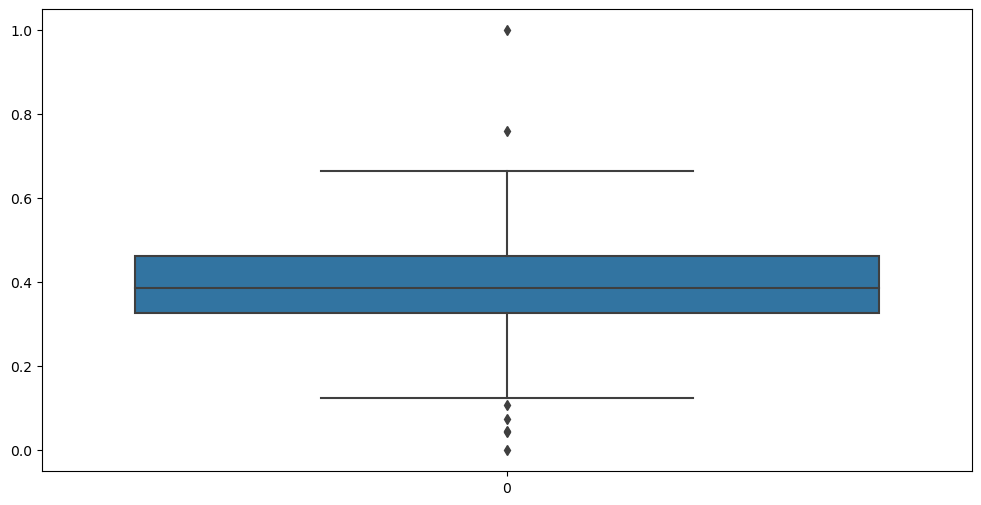

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df['RI'])
plt.show()

In [27]:
ul=df['RI'].mean()+2.5*df['RI'].std()
ll=df['RI'].mean()-2.5*df['RI'].std()
print(ul)
print(ll)

0.7091339126326832
0.0951020293349118


In [28]:
new=df.loc[(df['RI']<ul) & (df['RI']>ll)]
print('new',len(new))
print('old',len(df))

new 207
old 213


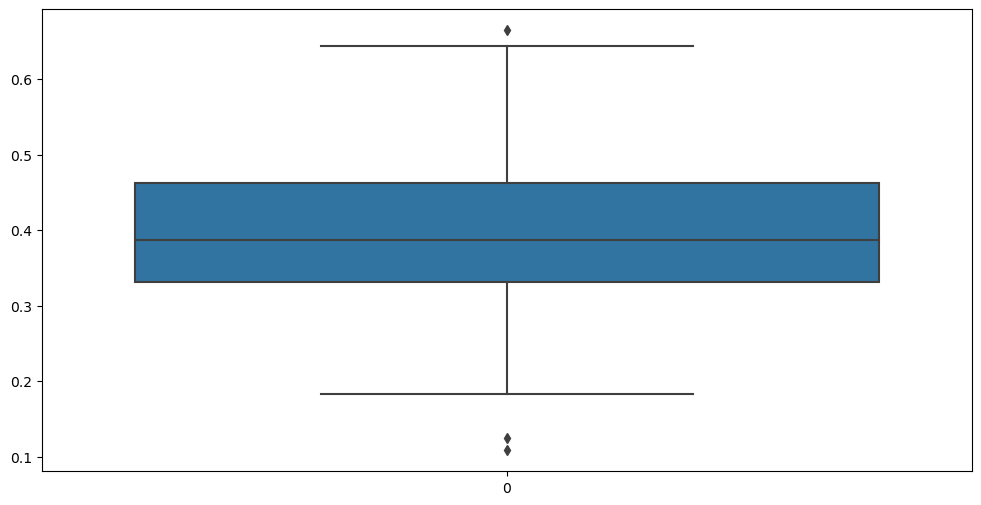

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new['RI'])
plt.show()

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301,0.851703
1,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301,0.851703
2,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301,0.851703
3,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301,0.851703
4,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301,0.851703


In [31]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 106, 106, 109, 110, 111, 130, 144, 161,
        162, 162, 162, 170, 170, 171, 171, 173, 183, 183, 187, 188, 200,
        200, 202, 206, 212], dtype=int64),
 array([5, 0, 3, 5, 6, 3, 5, 5, 5, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2, 4, 7, 0,
        3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [32]:

df.shape

(213, 9)

In [33]:
df1=df[(z<3).all(axis=1)]

In [34]:
df1.shape

(193, 9)

In [35]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  9.389671361502346


In [36]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-3*iqr)) | (df>(q3+3*iqr))).any(axis=1)]

In [37]:
df2.shape

(163, 9)

In [38]:
df=df1

In [39]:
df['target'].value_counts()

KeyError: 'target'

<Axes: >

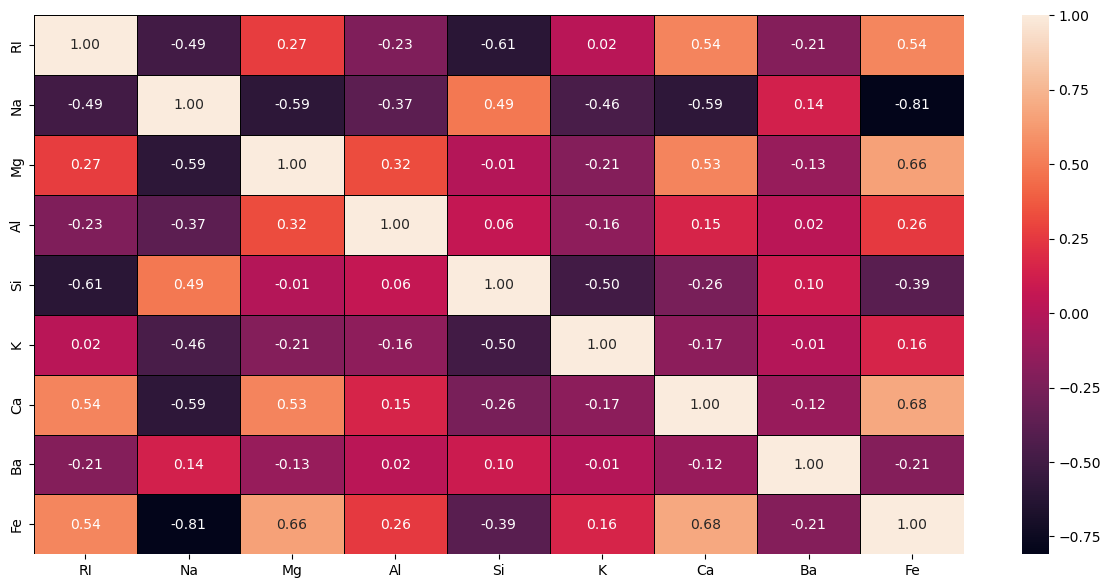

In [40]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')

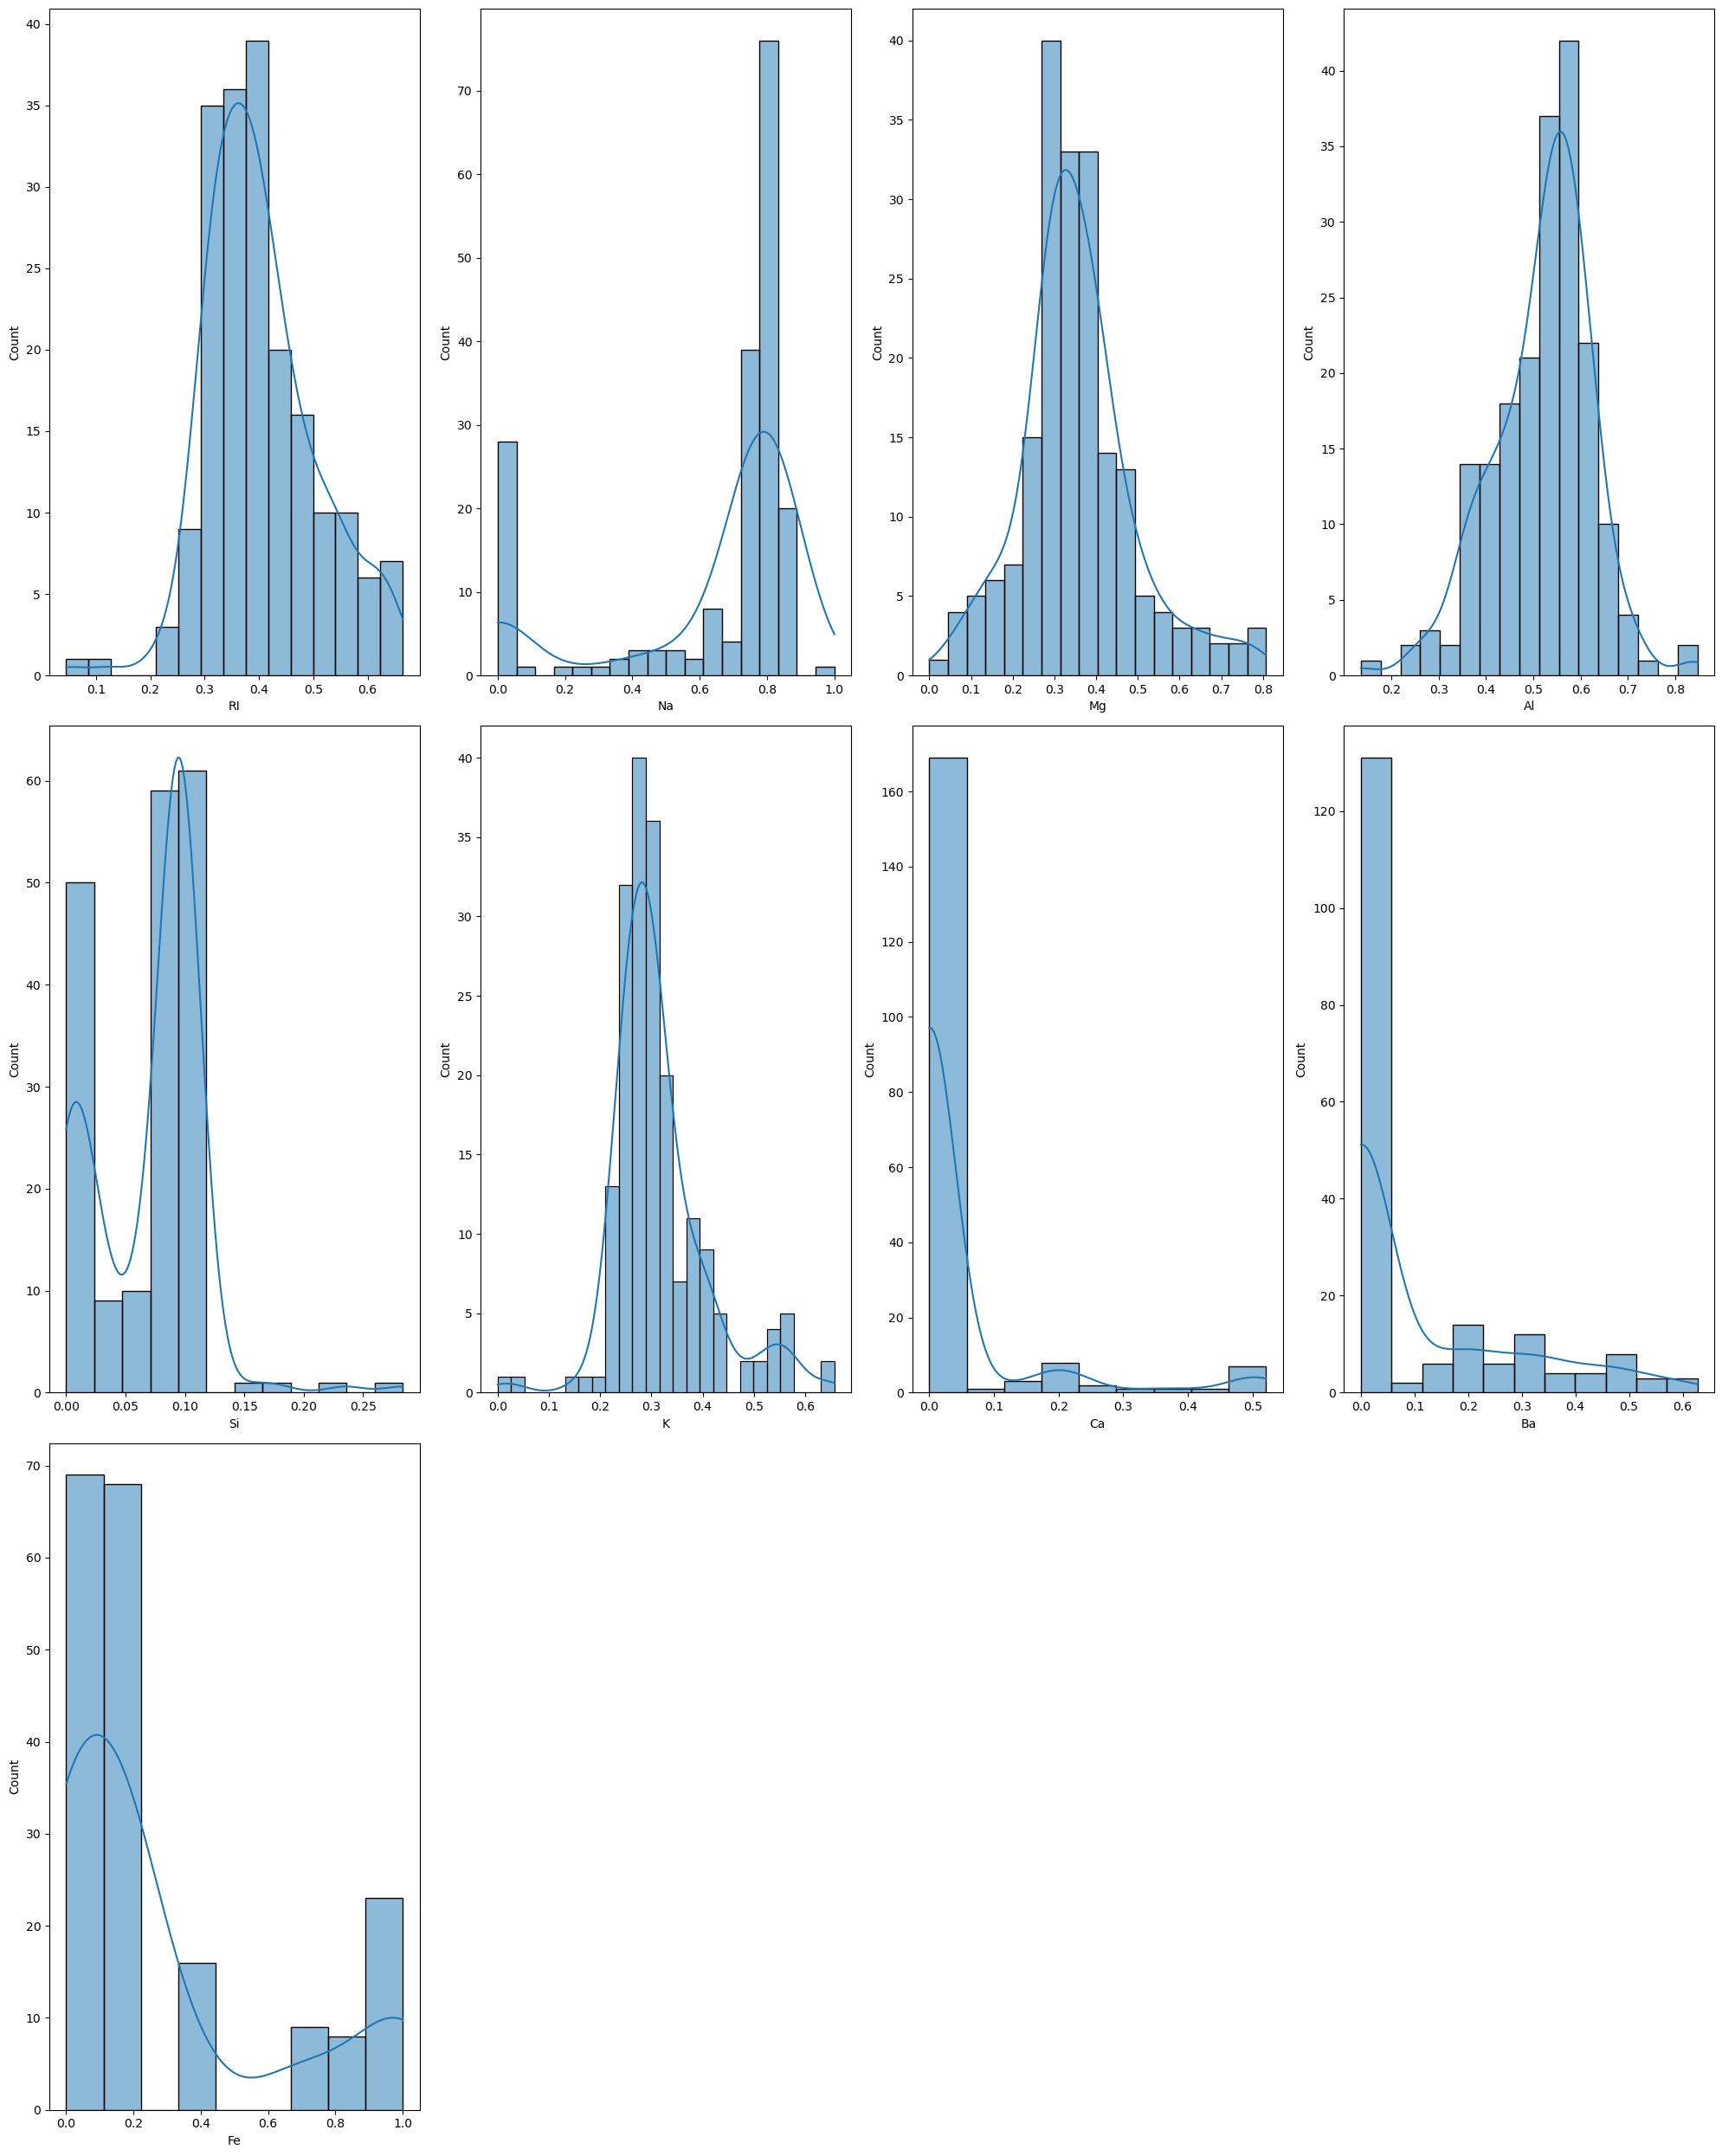

In [41]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(3,4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show() 

In [42]:
for i in df.columns:
    if i != 'target':
        df.plot.line(x=i, y='target')
        plt.show()

KeyError: 'target'

In [44]:
for i in df.columns:
    if i != 'target':
        sns.violinplot(x='target', y=i, data=df)
        plt.show()

ValueError: Could not interpret input 'target'

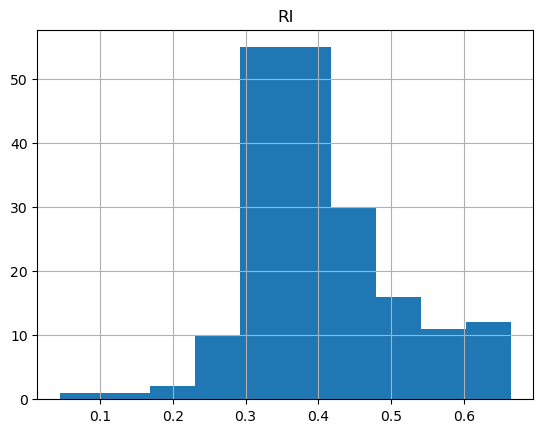

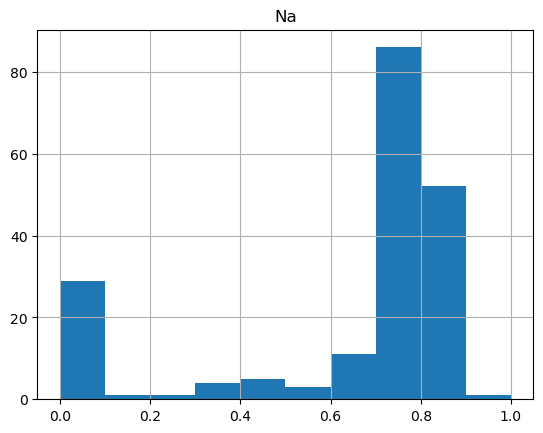

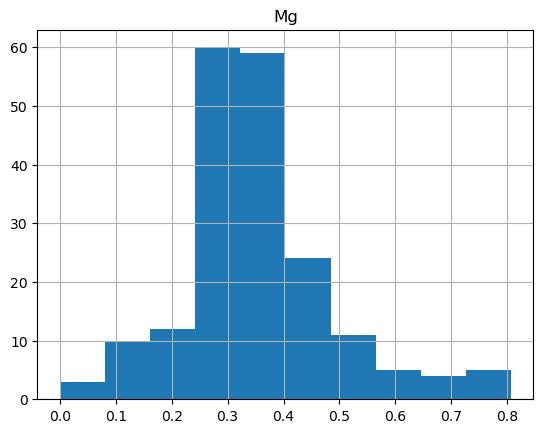

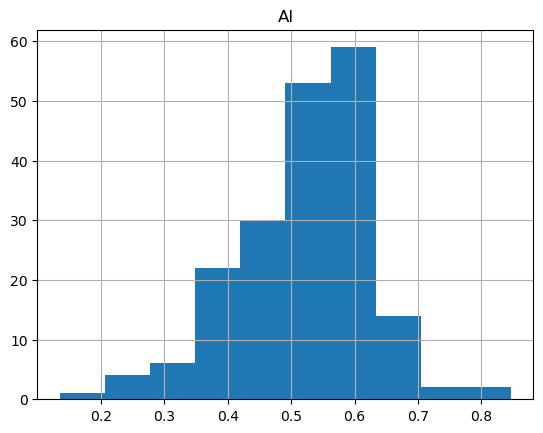

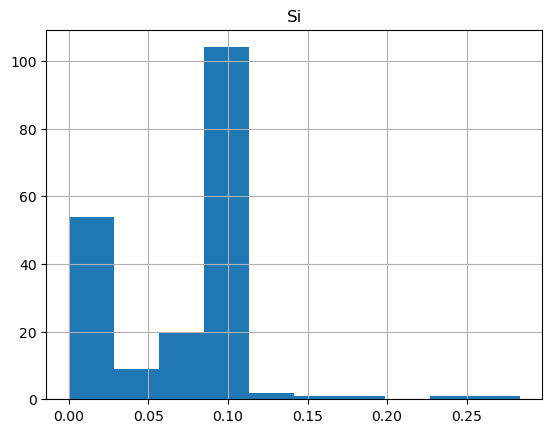

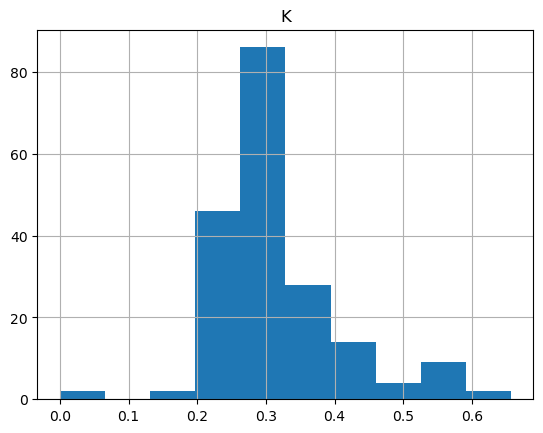

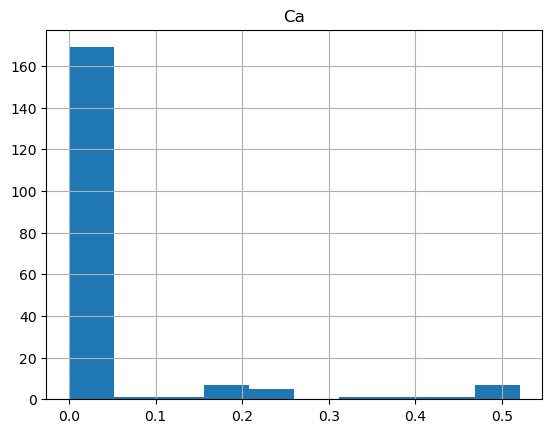

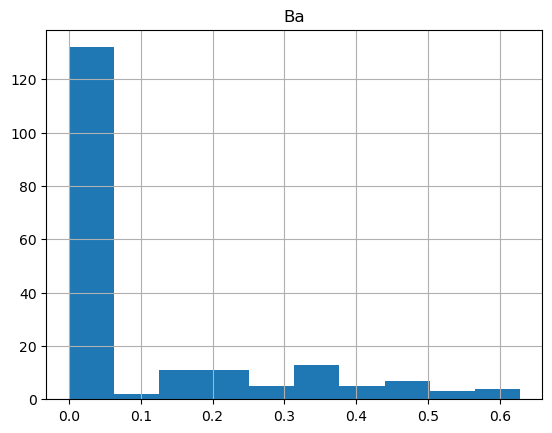

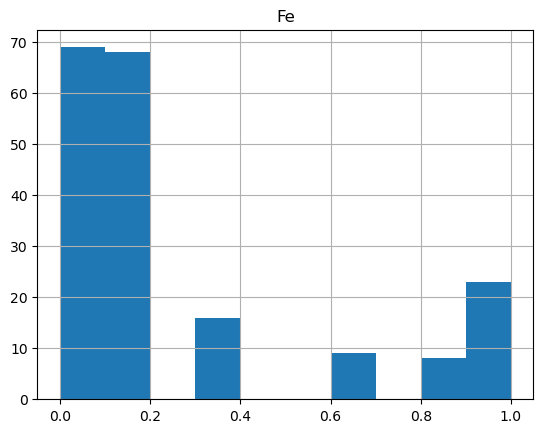

In [45]:
for i in df.columns:
    if df[i].dtype == 'float64' and i != 'target':
        df[i].hist()
        plt.title(i)
        plt.show()

In [46]:
df.var()

RI    0.010230
Na    0.085170
Mg    0.018752
Al    0.010813
Si    0.002063
K     0.008470
Ca    0.012912
Ba    0.028385
Fe    0.114748
dtype: float64

In [47]:
plt.figure(figsize=(22,7))
df.corr()['target'].sort_values(ascending=False).drop(['target']).plot(kind='bar')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

KeyError: 'target'

<Figure size 2200x700 with 0 Axes>

RI
0.3814893336957325


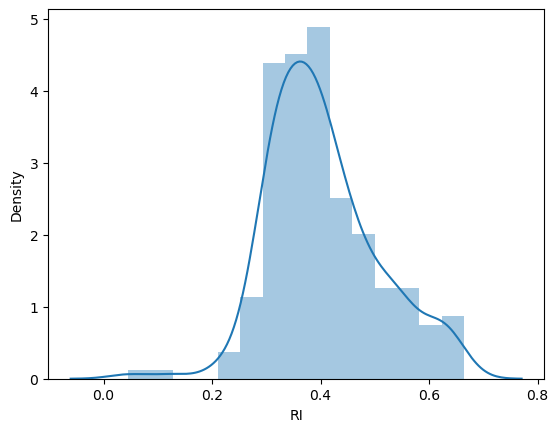

Na
-1.5099542235185723


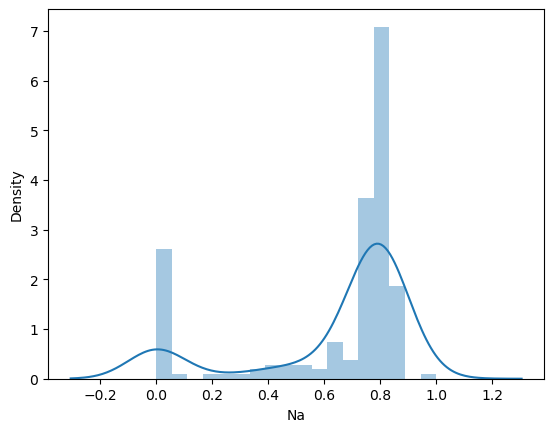

Mg
0.6950428504855695


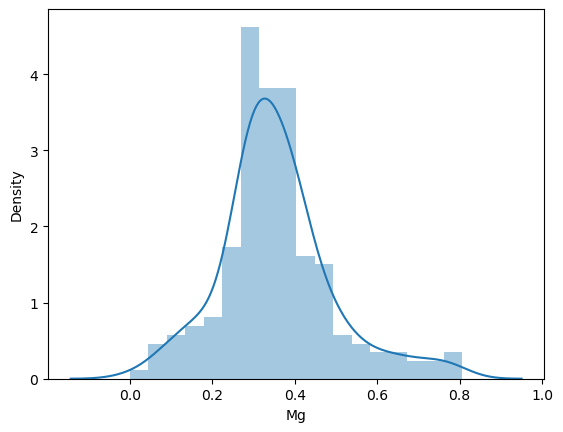

Al
-0.4326305816684167


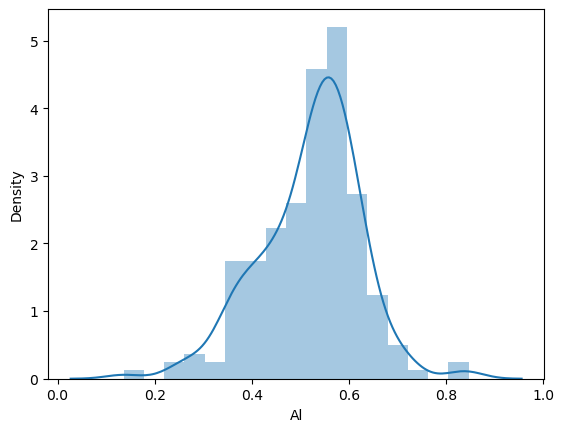

Si
0.2930864900131555


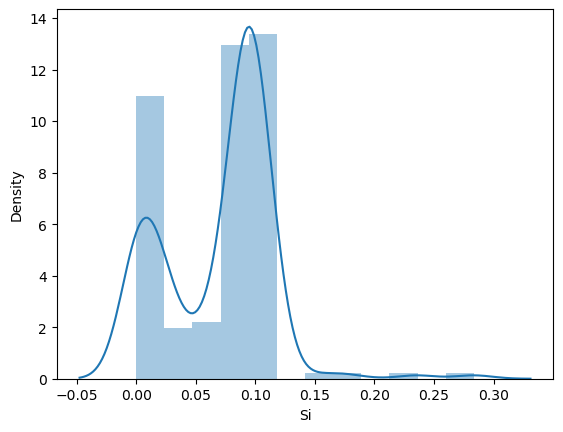

K
1.0811030232334262


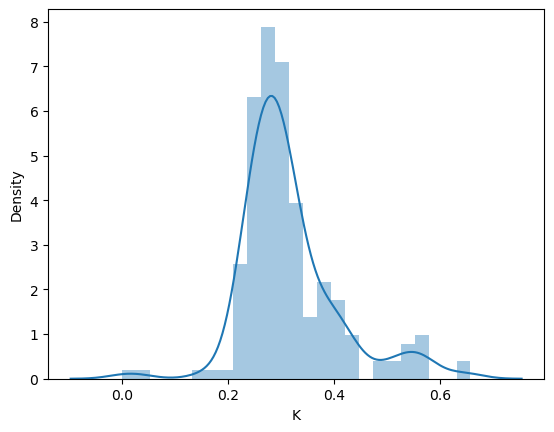

Ca
3.1535013155379827


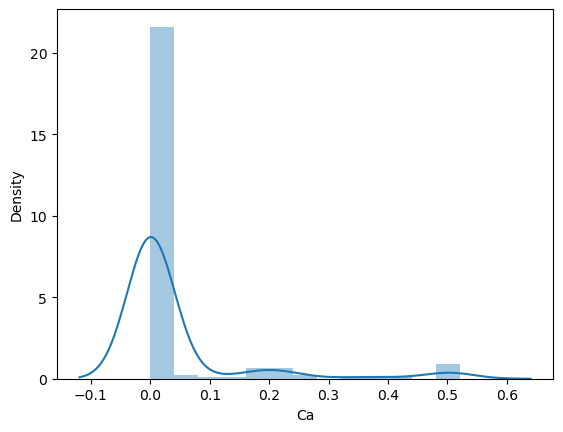

Ba
1.4670942674258618


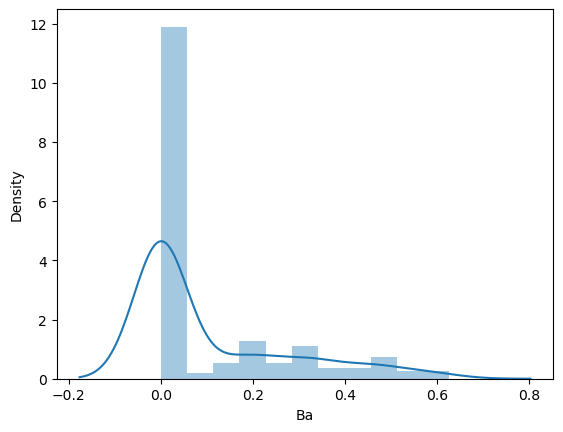

Fe
1.267330357907123


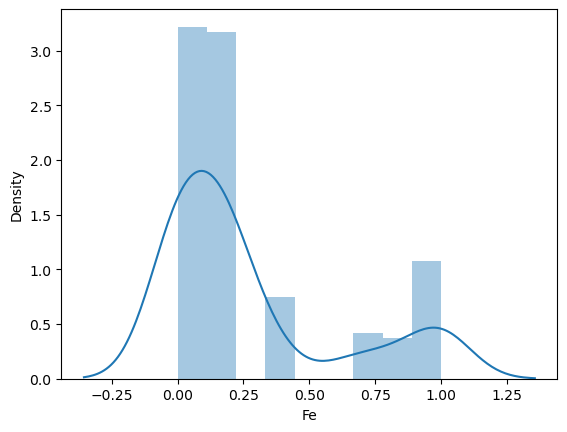

In [48]:
from scipy.stats import skew
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [49]:
df['Ba']=np.sqrt(df['Ba'])

In [50]:
skew(df['Ba'])

0.9921236559554772

In [51]:
df['RI']=np.sqrt(df['RI'])

In [52]:
skew(df['RI'])

-0.43108715738143083

In [53]:
df['Al']=np.sqrt(df['Al'])

In [54]:
skew(df['Al'])

-0.9512728425751327

In [55]:
df['Ca']=np.sqrt(df['Ca'])

In [56]:
df['Na']=np.sqrt(df['Na'])

In [57]:
skew(df['Ca'])

2.4367569866155816

In [58]:
df.skew()

RI   -0.434471
Na   -1.790918
Mg    0.700499
Al   -0.958740
Si    0.295387
K     1.089590
Ca    2.455886
Ba    0.999912
Fe    1.277279
dtype: float64

# machine learning

In [59]:
x=df.drop('target',axis=1)
y=df['target']

KeyError: "['target'] not found in axis"

In [60]:
from sklearn.preprocessing import StandardScaler
x = x.apply(pd.to_numeric, errors='coerce')
x = x.astype(float)
x.fillna(x.mean(), inplace=True)

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

NameError: name 'x' is not defined

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

NameError: name 'x' is not defined

In [62]:
y.value_counts()

NameError: name 'y' is not defined

In [63]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

NameError: name 'x' is not defined

In [64]:
y1.value_counts()

NameError: name 'y1' is not defined

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

NameError: name 'x' is not defined

In [67]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [68]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

NameError: name 'x_train' is not defined

In [69]:
value.score(x_train,y_train)

NameError: name 'x_train' is not defined

In [70]:
value.score(x_test,y_test)


NameError: name 'x_test' is not defined

In [71]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acc[key]=accuracy_score(y_test, value)
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
    'Accuracy':acc,
})

print("\n details for each model:")
print(details)

best_model =max(acc, key=acc.get) and  min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


 details for each model:
Empty DataFrame
Columns: [MAE, MSE, R-squared, RMSE, Accuracy]
Index: []


ValueError: max() arg is an empty sequence

In [72]:
cvs = {}
diff = {}

for key, value in model.items():
    value.fit(x1, y1)
    y_pred = value.predict(x_test)

    cvs[key] = cross_val_score(value, x1, y1, cv=5).mean()
    diff[key] = accuracy_score(y_test, y_pred) - cvs[key]

print("Cross-Validation Scores:")
print(cvs)
print("Difference between Accuracy and Cross-Validation Mean:")
print(diff)

NameError: name 'x1' is not defined

In [73]:
final_model = GradientBoostingClassifier()
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

NameError: name 'x_train' is not defined

In [74]:
print(classification_report(y_test,y_pred))

NameError: name 'y_test' is not defined

In [75]:
print(confusion_matrix(y_test,y_pred))

NameError: name 'y_test' is not defined

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

roc_display.plot()
plt.show()

NameError: name 'y_test' is not defined

In [77]:
prediction=final_model.predict(x_test) 
prediction

NameError: name 'x_test' is not defined

In [78]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df.head()

NameError: name 'y_test' is not defined

In [79]:
x.head(1)

NameError: name 'x' is not defined

In [80]:
print('glass type is ',model['gb'].predict(scaler.transform([[1.25814,0.387686,1.235597,-0.663515,-1.627964,-1.326595,0.008912,-0.398659,-0.605187]])))


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [81]:
y.head(1)

NameError: name 'y' is not defined

In [82]:
x.tail(1)

NameError: name 'x' is not defined

In [83]:
y.tail(1)

NameError: name 'y' is not defined

In [84]:
print('glass type ',model['gb'].predict(scaler.transform([[-0.621918,1.361458,-2.199867,1.105438,1.522787,-1.539867,-0.25867,3.432106,-0.605187]])))


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# user own values input

In [ ]:
predictions = {}
RI = float(input("Enter the value for RI: "))
Na = float(input("Enter the value for Na: "))
Mg = float(input("Enter the value for Mg: "))
Al = float(input("Enter the value for Al: "))
Si = float(input("Enter the value for Si: "))
K = float(input("Enter the value for K: "))
Ca = float(input("Enter the value for Ca: "))
Ba = float(input("Enter the value for Ba: "))
Fe = float(input("Enter the value for Fe: "))

user_input = [[RI,Na,Mg,Al,Si,K,Ca,Ba,Fe]]
scaled_input = scaler.transform(user_input)
prediction = model['gb'].predict(scaled_input)

print('type of glass:', prediction[0])

In [ ]:
predictions = {}
RI = float(input("Enter the value for RI: "))
Na = float(input("Enter the value for Na: "))
Mg = float(input("Enter the value for Mg: "))
Al = float(input("Enter the value for Al: "))
Si = float(input("Enter the value for Si: "))
K = float(input("Enter the value for K: "))
Ca = float(input("Enter the value for Ca: "))
Ba = float(input("Enter the value for Ba: "))
Fe = float(input("Enter the value for Fe: "))

user_input = [[RI,Na,Mg,Al,Si,K,Ca,Ba,Fe]]
scaled_input = scaler.transform(user_input)
prediction = model['gb'].predict(scaled_input)

print('type of glass :', prediction[0])